# Step 1: Data cleaning or preprocessing

# Importing the relevent libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
sns.set()

# Importing the raw data

In [2]:
df = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
df.shape

(4340, 8)

In [4]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
df.duplicated().sum()

763

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.shape

(3577, 8)

# Exploring the descriptive statistics of the variables

In [9]:
df.describe()

,year,selling_price,km_driven
count,3577.000000,3.577000e+03,3577.000000
mean,2012.962538,4.739125e+05,69250.545709
std,4.251759,5.093018e+05,47579.940016
min,1992.000000,2.000000e+04,1.000000
25%,2010.000000,2.000000e+05,36000.000000
50%,2013.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [10]:
for column in df.columns:
    print(f'{column} : {df[column].nunique()}')
    print('----------------------------------------')

name : 1491
----------------------------------------
year : 27
----------------------------------------
selling_price : 445
----------------------------------------
km_driven : 770
----------------------------------------
fuel : 5
----------------------------------------
seller_type : 3
----------------------------------------
transmission : 2
----------------------------------------
owner : 5
----------------------------------------


In [11]:
def brand_extractor(text):
    return text.split()[0]

In [12]:
data = df.copy()

In [13]:
data['brand'] = data['name'].apply(brand_extractor)

In [14]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


In [15]:
data['brand'].nunique()

29

In [16]:
data['brand'].value_counts()

brand
Maruti           1072
Hyundai           637
Mahindra          328
Tata              308
Ford              220
Honda             216
Toyota            170
Chevrolet         151
Renault           110
Volkswagen         93
Nissan             52
Skoda              49
Fiat               32
Audi               31
Datsun             29
BMW                25
Mercedes-Benz      21
Jaguar              5
Mitsubishi          5
Land                5
Volvo               4
Jeep                3
Ambassador          3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: count, dtype: int64

In [17]:
car_names = ['Jaguar', 'Mitsubishi', 'Land', 'Volvo', 'Ambassador', 'MG', 'OpelCorsa', 'Daewoo', 'Force', 'Isuzu', 'Kia',
            'Jeep']

In [18]:
for car_name in car_names:
    data = data[data['brand'] != car_name]

In [19]:
data['brand'].value_counts()

brand
Maruti           1072
Hyundai           637
Mahindra          328
Tata              308
Ford              220
Honda             216
Toyota            170
Chevrolet         151
Renault           110
Volkswagen         93
Nissan             52
Skoda              49
Fiat               32
Audi               31
Datsun             29
BMW                25
Mercedes-Benz      21
Name: count, dtype: int64

In [20]:
data.shape

(3544, 9)

In [21]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


# Determining the variables of interest

In [22]:
data.drop(columns = ['name'], axis = 1, inplace = True)

In [23]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


In [24]:
numerical_columns, categorical_columns = [], []
for column in data.columns:
    if data[column].dtype == 'object':
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)

In [25]:
categorical_columns

['fuel', 'seller_type', 'transmission', 'owner', 'brand']

In [26]:
numerical_columns

['year', 'selling_price', 'km_driven']

# Exploring the PDFs

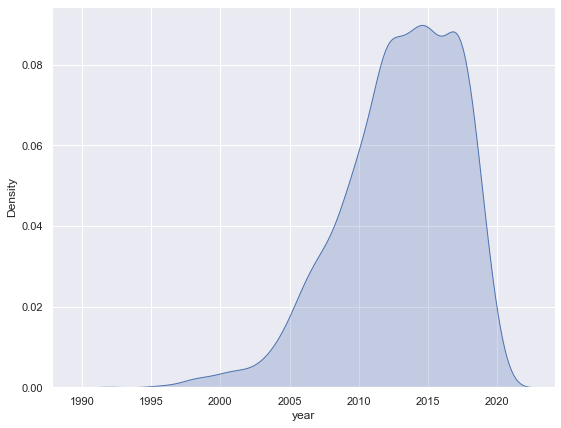

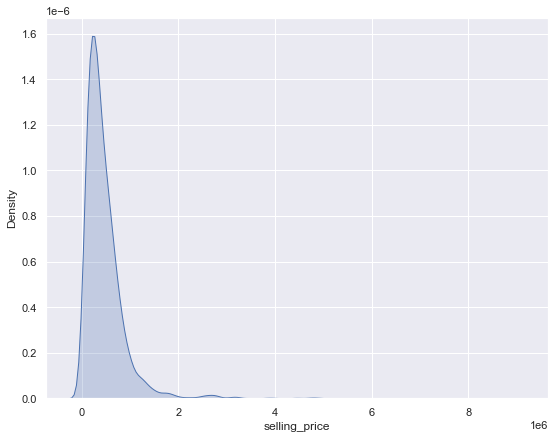

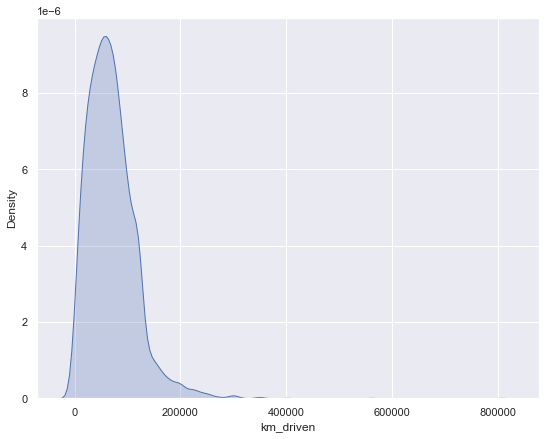

In [27]:
for column in numerical_columns:
    plt.figure(figsize = (9, 7))
    sns.kdeplot(data[column], shade = True, legend = False)
    plt.show()

# Dealing with outliers

In [28]:
data['selling_price'].quantile(0.99)

2586400.0000000033

In [29]:
q = data['selling_price'].quantile(0.99)
data_1 = data[data['selling_price'] < q]

In [30]:
data_1.shape

(3508, 8)

In [31]:
data_1.describe()

,year,selling_price,km_driven
count,3508.000000,3.508000e+03,3508.000000
mean,2012.920182,4.300380e+05,69601.638826
std,4.237854,3.315950e+05,47616.244636
min,1992.000000,2.000000e+04,1.000000
25%,2010.000000,2.000000e+05,37592.500000
50%,2013.000000,3.500000e+05,61674.000000
75%,2016.000000,5.750000e+05,90000.000000
max,2020.000000,2.575000e+06,806599.000000


In [32]:
data.describe()

,year,selling_price,km_driven
count,3544.000000,3.544000e+03,3544.000000
mean,2012.964729,4.627746e+05,69216.541479
std,4.242128,4.839001e+05,47585.546315
min,1992.000000,2.000000e+04,1.000000
25%,2010.000000,2.000000e+05,36000.000000
50%,2013.000000,3.500000e+05,60000.000000
75%,2016.000000,5.900000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


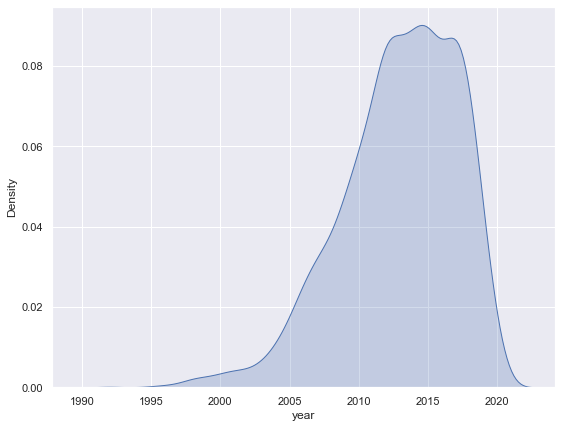

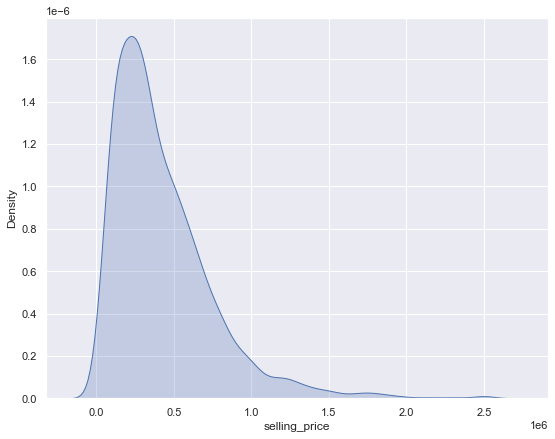

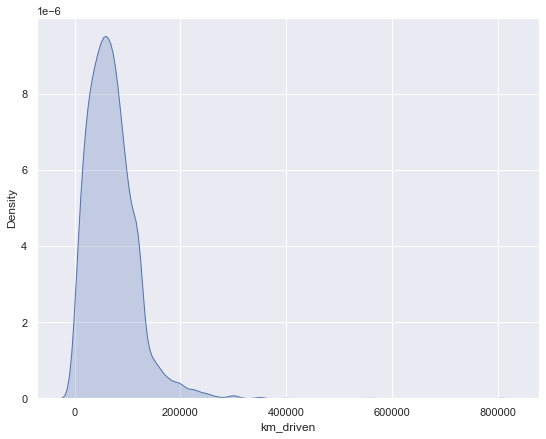

In [33]:
for column in numerical_columns:
    plt.figure(figsize = (9, 7))
    sns.kdeplot(data_1[column], shade = True, legend = False)
    plt.show()

In [34]:
data_1['year'].quantile(0.99)

2020.0

In [35]:
q2 = data_1['year'].quantile(0.99)

In [36]:
data_2 = data_1[data_1['year'] < q2]

In [37]:
data_2['km_driven'].quantile(0.99)

224023.33999999988

In [38]:
q3 = data_2['km_driven'].quantile(0.99)

In [39]:
data_3 = data_2[data_2['km_driven'] < q3]

In [40]:
data_3.shape

(3429, 8)

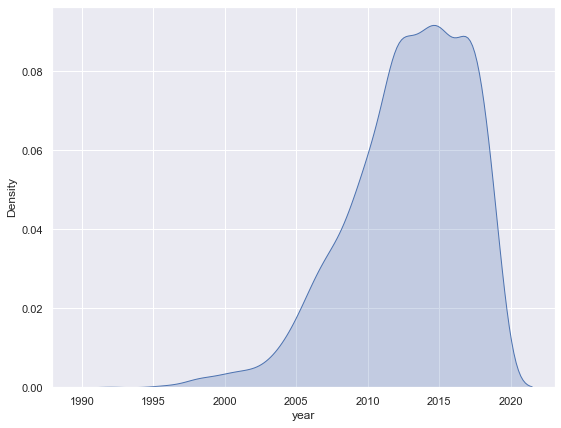

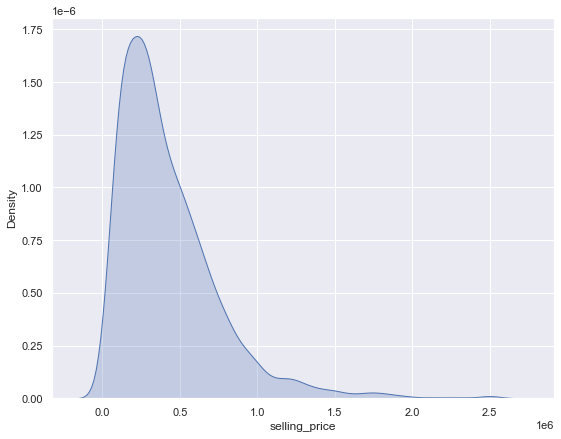

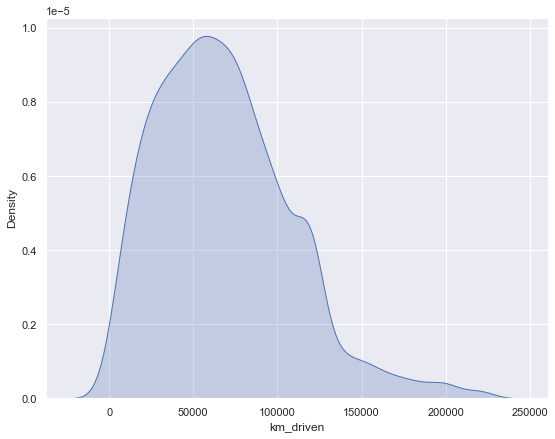

In [41]:
for column in numerical_columns:
    plt.figure(figsize = (9, 7))
    sns.kdeplot(data_3[column], shade = True, legend = False)
    plt.show()

In [42]:
q1_1 = data_3['year'].quantile(0.01)

In [43]:
data_4 = data_3[data_3['year'] > q1_1]

In [44]:
q2_2 = data_4['selling_price'].quantile(0.01)

In [45]:
data_5 = data_4[data_4['selling_price'] > q2_2]

In [46]:
q3_3 = data_5['km_driven'].quantile(0.01)

In [47]:
data_6 = data_5[data_5['selling_price'] > q3_3]

In [48]:
data_6.shape

(3358, 8)

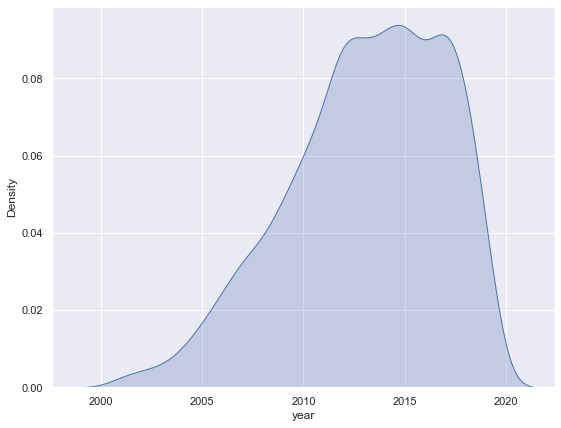

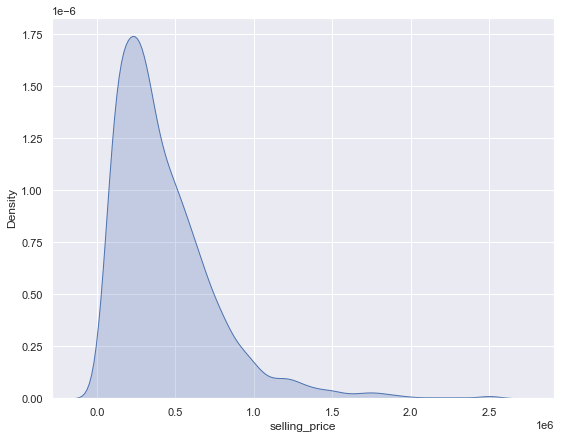

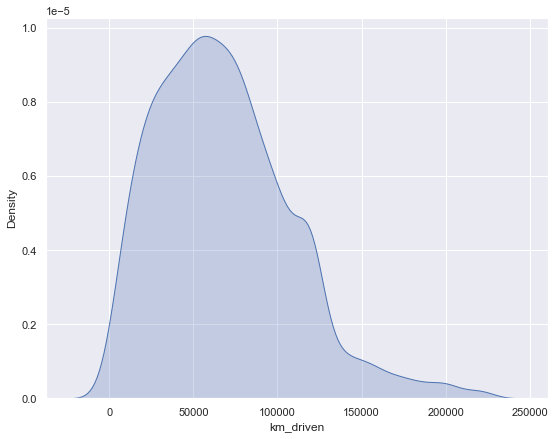

In [49]:
for column in numerical_columns:
    plt.figure(figsize = (9, 7))
    sns.kdeplot(data_6[column], shade = True, legend = False)
    plt.show()

In [50]:
data_6[data_6['year'] < 2005].shape

(75, 8)

In [51]:
data_6[data_6['selling_price'] > 1000000].shape

(176, 8)

In [52]:
data_6[data_6['km_driven'] > 150000].shape

(122, 8)

In [53]:
data_7 = data_6[data_6['year'] > 2005]
data_7 = data_7[data_7['selling_price'] < 1000000]
data_7 = data_7[data_7['km_driven'] < 150000]

In [54]:
data_7.shape

(2901, 8)

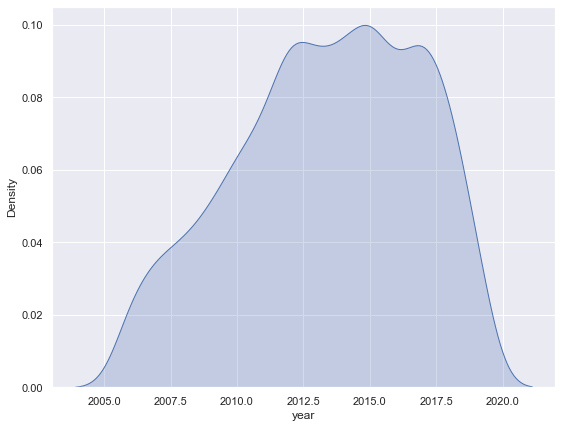

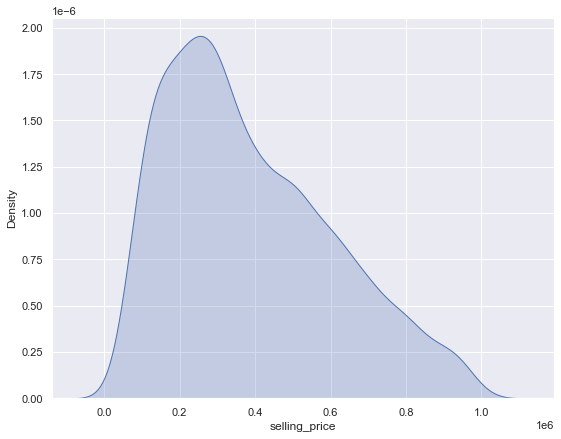

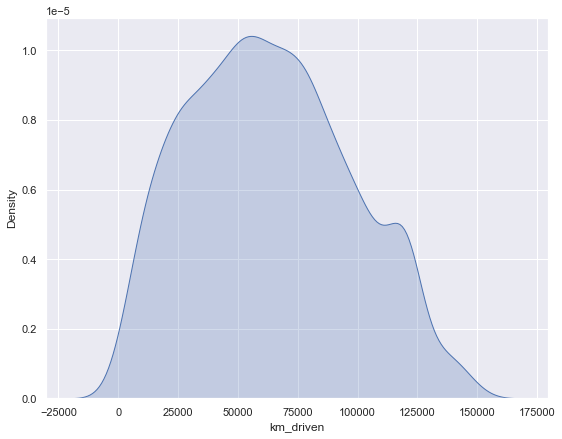

In [55]:
for column in numerical_columns:
    plt.figure(figsize = (9, 7))
    sns.kdeplot(data_7[column], shade = True, legend = False)
    plt.show()

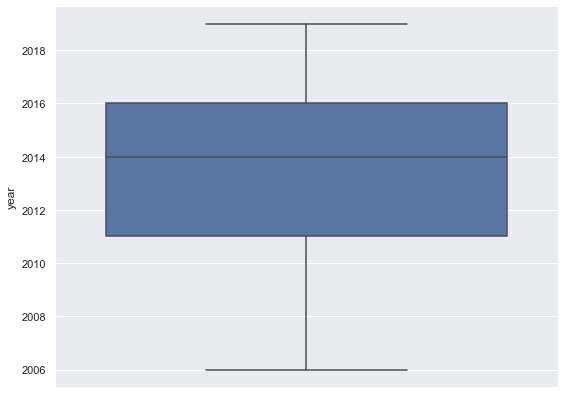

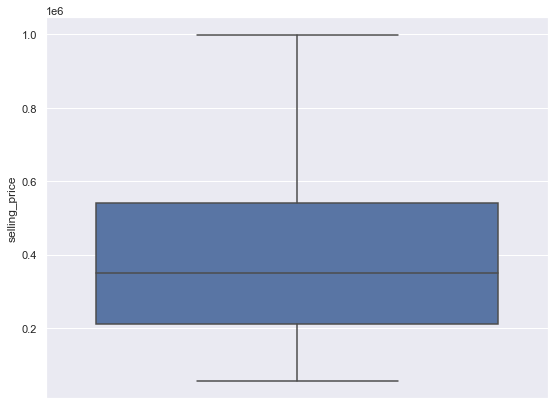

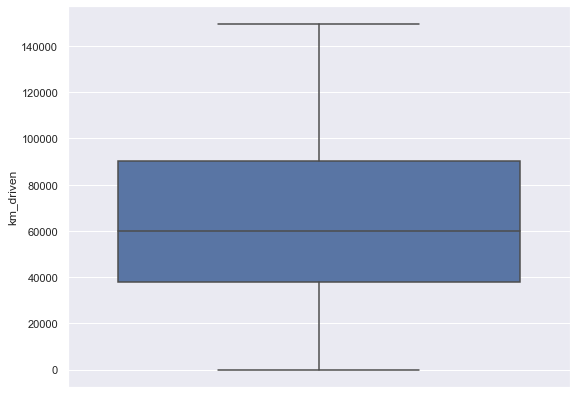

In [56]:
for column in numerical_columns:
    plt.figure(figsize = (9, 7))
    sns.boxplot(data = data_7, y = column)
    plt.show()

In [57]:
data_7.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


In [58]:
data_cleaned = data_7.reset_index(drop = True)
data_cleaned.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


In [59]:
data_cleaned.describe()

,year,selling_price,km_driven
count,2901.000000,2901.000000,2901.000000
mean,2013.382282,388054.660462,63506.540848
std,3.432856,220013.701874,33681.603646
min,2006.000000,57000.000000,1.000000
25%,2011.000000,211000.000000,38000.000000
50%,2014.000000,350000.000000,60000.000000
75%,2016.000000,540000.000000,90000.000000
max,2019.000000,999000.000000,149674.000000


In [60]:
data_cleaned.shape

(2901, 8)

# Step2: Checking the regression assumptions

# 1- Linearity

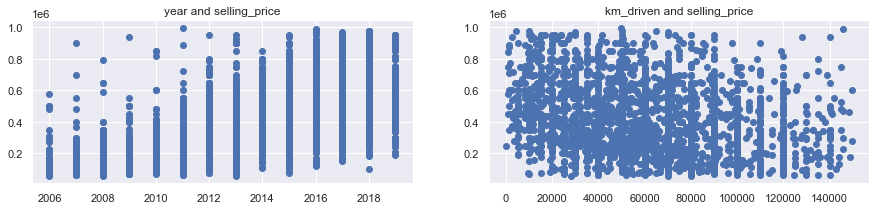

In [61]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = False, figsize = (15, 3))
ax1.scatter(data_cleaned['year'], data_cleaned['selling_price'])
ax1.set_title('year and selling_price')

ax2.scatter(data_cleaned['km_driven'], data_cleaned['selling_price'])
ax2.set_title('km_driven and selling_price')

plt.show()

In [62]:
log_price = np.log(data_cleaned['selling_price'])
data_cleaned['log_price'] = log_price

In [63]:
data_cleaned_2 = data_cleaned.drop(columns = ['selling_price'], axis = 1)

In [64]:
data_cleaned_2.head()

,year,km_driven,fuel,seller_type,transmission,owner,brand,log_price
0,2007,70000,Petrol,Individual,Manual,First Owner,Maruti,11.002100
1,2007,50000,Petrol,Individual,Manual,First Owner,Maruti,11.813030
2,2012,100000,Diesel,Individual,Manual,First Owner,Hyundai,13.304685
3,2017,46000,Petrol,Individual,Manual,First Owner,Datsun,12.429216
4,2014,141000,Diesel,Individual,Manual,Second Owner,Honda,13.017003


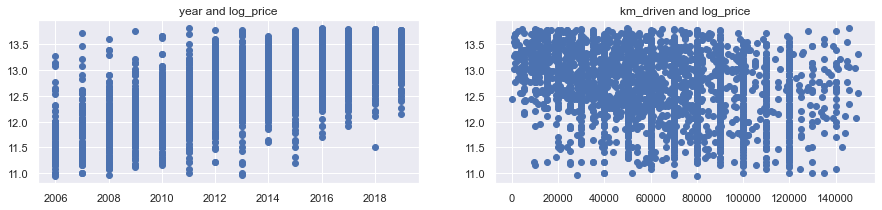

In [65]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = False, figsize = (15, 3))
ax1.scatter(data_cleaned_2['year'], data_cleaned_2['log_price'])
ax1.set_title('year and log_price')

ax2.scatter(data_cleaned_2['km_driven'], data_cleaned_2['log_price'])
ax2.set_title('km_driven and log_price')

plt.show()

# 2- No Endogeneity

In [66]:
X = data_cleaned_2[['year', 'km_driven']]
y = data_cleaned_2['log_price']

In [67]:
X1 = sm.add_constant(X)
model_sm = sm.OLS(y, X1).fit()
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     1342.
Date:                Fri, 20 Sep 2024   Prob (F-statistic):               0.00
Time:                        03:59:24   Log-Likelihood:                -1845.1
No. Observations:                2901   AIC:                             3696.
Df Residuals:                    2898   BIC:                             3714.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -262.8099      5.819    -45.160      0.000    -274.221    -251.399
year           0.1368      0.003     47.398      0.000       0.131       0.142
km_driven   1.909e-06   2.94e-07      6.491      0.000    1.33e-06    2.49e-06
==============================================================================
Omnibus:                        9.520   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.009   Jarque-Bera (JB):               10.522
Skew:                          -0.086   Prob(JB):                      0.00519
Kurtosis:                       3.240   Cond. No.                     4.93e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.93e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 3- Normality and Homoscedasticity

### Just check the above graphs. Since intercept has been included in our model, so the mean of error is ZERO.

# 4- No Autocorrelation

### We should not be worry, because our data is not a time series data or a panel data.

# 5- No Multicollinearity

### VIF (Variance Inflation Factor)  and its application in detecting Multicollinearity
### If VIF > 10, then multicollinearity is high and we should remove that item.

In [68]:
data_cleaned_2.columns

Index(['year', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner',
       'brand', 'log_price'],
      dtype='object')

In [69]:
variables = data_cleaned_2[['year', 'km_driven']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [70]:
vif

,VIF,features
0,4.541245,year
1,4.541245,km_driven


# Step 3: Create dummy Variables

In [71]:
preprocessed_data = pd.get_dummies(data = data_cleaned_2, columns = categorical_columns, drop_first = True, dtype = 'int')

In [72]:
preprocessed_data.head()

,year,km_driven,log_price,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,...,brand_Hyundai,brand_Mahindra,brand_Maruti,brand_Mercedes-Benz,brand_Nissan,brand_Renault,brand_Skoda,brand_Tata,brand_Toyota,brand_Volkswagen
0,2007,70000,11.002100,0,0,0,1,1,0,1,...,0,0,1,0,0,0,0,0,0,0
1,2007,50000,11.813030,0,0,0,1,1,0,1,...,0,0,1,0,0,0,0,0,0,0
2,2012,100000,13.304685,1,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
3,2017,46000,12.429216,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2014,141000,13.017003,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [73]:
preprocessed_data.columns

Index(['year', 'km_driven', 'log_price', 'fuel_Diesel', 'fuel_Electric',
       'fuel_LPG', 'fuel_Petrol', 'seller_type_Individual',
       'seller_type_Trustmark Dealer', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner', 'brand_BMW',
       'brand_Chevrolet', 'brand_Datsun', 'brand_Fiat', 'brand_Ford',
       'brand_Honda', 'brand_Hyundai', 'brand_Mahindra', 'brand_Maruti',
       'brand_Mercedes-Benz', 'brand_Nissan', 'brand_Renault', 'brand_Skoda',
       'brand_Tata', 'brand_Toyota', 'brand_Volkswagen'],
      dtype='object')

In [74]:
preprocessed_data.shape

(2901, 30)

# Step 4: Creating the linear regression model

In [75]:
targets = preprocessed_data['log_price']
inputs = preprocessed_data.drop(columns = ['log_price'], axis = 1)

In [76]:
scaler = StandardScaler()
inputs_scaled = scaler.fit_transform(inputs)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size = 0.2, random_state = 101, shuffle = True)

In [78]:
X_train.shape

(2320, 29)

In [79]:
X_test.shape

(581, 29)

In [80]:
model1 = LinearRegression()

In [81]:
model1.fit(X_train, y_train)

LinearRegression()

In [82]:
yhat = model1.predict(X_train)

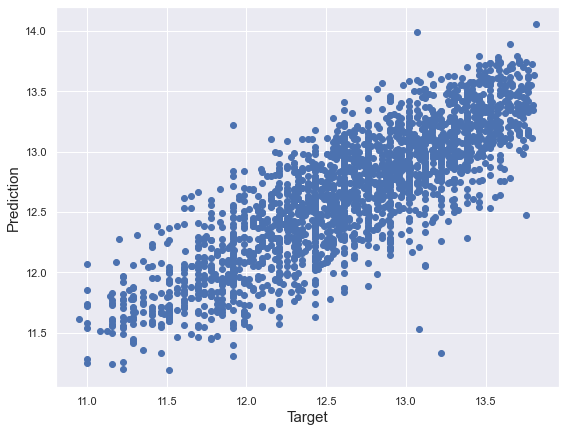

In [83]:
plt.figure(figsize = (9, 7))
plt.scatter(y_train, yhat)
plt.xlabel('Target', fontsize = 15)
plt.ylabel('Prediction', fontsize = 15)
plt.show()

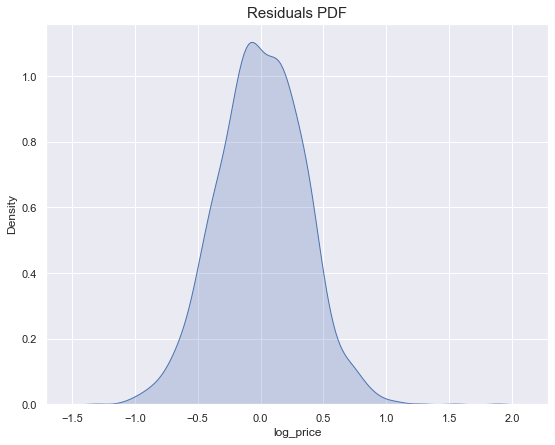

In [84]:
plt.figure(figsize = (9, 7))
sns.kdeplot(y_train - yhat, shade = True)
plt.title('Residuals PDF', size = 15)
plt.show()

In [85]:
model1.score(X_train, y_train)

0.7032587665154832

In [86]:
model1.intercept_

12.685375278168586

In [87]:
model1.coef_

array([ 0.3778633 , -0.03226077,  0.22366439,  0.0052571 , -0.0087949 ,
        0.02631075, -0.04095969,  0.02057159, -0.05416951, -0.0164996 ,
       -0.01888051, -0.00559169, -0.02936383, -0.01055085, -0.30517512,
       -0.1469568 , -0.13363143, -0.26724929, -0.21558982, -0.4153041 ,
       -0.25385256, -0.55566778, -0.00187481, -0.12752226, -0.22689549,
       -0.11068703, -0.43096079, -0.11675973, -0.16746102])

In [88]:
r2 = model1.score(X_train, y_train)
n = X_train.shape[0]
p = X_train.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
adjusted_r2

0.6995009081001771

In [89]:
model1_summary = pd.DataFrame(data = inputs.columns, columns = ['Features'])
model1_summary['Coefficient'] = model1.coef_

In [90]:
model1_summary

,Features,Coefficient
0,year,0.377863
1,km_driven,-0.032261
2,fuel_Diesel,0.223664
3,fuel_Electric,0.005257
4,fuel_LPG,-0.008795
5,fuel_Petrol,0.026311
6,seller_type_Individual,-0.040960
7,seller_type_Trustmark Dealer,0.020572
8,transmission_Manual,-0.054170
9,owner_Fourth & Above Owner,-0.016500


# Step 5: Testing our model

In [91]:
yhat_test = model1.predict(X_test)

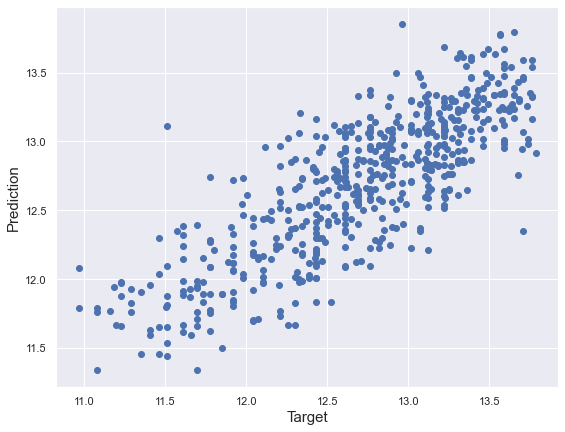

In [92]:
plt.figure(figsize = (9, 7))
plt.scatter(y_test, yhat_test)
plt.xlabel('Target', fontsize = 15)
plt.ylabel('Prediction', fontsize = 15)
plt.show()

In [93]:
y_test.head()

1408    13.049793
2688    13.732128
1950    12.691580
1498    12.821258
316     13.217674
Name: log_price, dtype: float64

In [94]:
y_test_re = y_test.reset_index(drop = True)

In [95]:
y_test_re.head()

0    13.049793
1    13.732128
2    12.691580
3    12.821258
4    13.217674
Name: log_price, dtype: float64

In [96]:
df_performance = pd.DataFrame()
df_performance['Target'] = np.exp(y_test_re)

In [97]:
df_performance.head()

,Target
0,465000.0
1,919999.0
2,325000.0
3,370000.0
4,550000.0


In [98]:
df_performance['Prediction'] = np.exp(yhat_test)
df_performance.head()

,Target,Prediction
0,465000.0,538077.974887
1,919999.0,574233.005383
2,325000.0,289831.155008
3,370000.0,212895.398660
4,550000.0,296968.578225


In [99]:
df_performance['Residual'] = df_performance['Target'] - df_performance['Prediction']
df_performance['Percent Error'] = np.absolute(df_performance['Residual'] / df_performance['Target'] * 100)
df_performance

,Target,Prediction,Residual,Percent Error
0,465000.0,538077.974887,-73077.974887,15.715694
1,919999.0,574233.005383,345765.994617,37.583301
2,325000.0,289831.155008,35168.844992,10.821183
3,370000.0,212895.398660,157104.601340,42.460703
4,550000.0,296968.578225,253031.421775,46.005713
...,...,...,...,...
576,185000.0,253341.301912,-68341.301912,36.941244
577,200000.0,124396.944854,75603.055146,37.801528
578,120000.0,84199.136842,35800.863158,29.834053
579,500000.0,305934.088695,194065.911305,38.813182


In [100]:
df_performance.describe()

,Target,Prediction,Residual,Percent Error
count,581.000000,5.810000e+02,581.000000,581.000000
mean,392135.920826,3.678472e+05,24288.674119,30.484239
std,219085.349698,1.791970e+05,141758.666982,30.781232
min,58000.000000,8.407795e+04,-612809.079650,0.039086
25%,225000.000000,2.198829e+05,-60550.562948,11.033015
50%,350000.000000,3.483468e+05,6881.298055,23.603020
75%,550000.000000,4.794951e+05,96731.480376,39.237794
max,969999.000000,1.037809e+06,669429.670191,395.731900


In [101]:
pd.options.display.max_rows = df_performance.shape[0]
df_performance.sort_values(by = ['Percent Error'], inplace = True)
df_performance

,Target,Prediction,Residual,Percent Error
179,570000.0,5.697772e+05,222.790067,0.039086
440,130000.0,1.301072e+05,-107.220873,0.082478
416,430999.0,4.315372e+05,-538.224362,0.124878
59,320000.0,3.190635e+05,936.487610,0.292652
67,95000.0,9.464141e+04,358.589920,0.377463
253,500000.0,5.020895e+05,-2089.464416,0.417893
34,590000.0,5.932631e+05,-3263.129252,0.553073
55,509999.0,5.064855e+05,3513.510862,0.688925
349,490000.0,4.865884e+05,3411.587815,0.696242
560,190000.0,1.886431e+05,1356.928781,0.714173
